# Cavendish-Experiment
Messung der Gravitationskonstante $G$ mit dem Cavendish-Aufbau

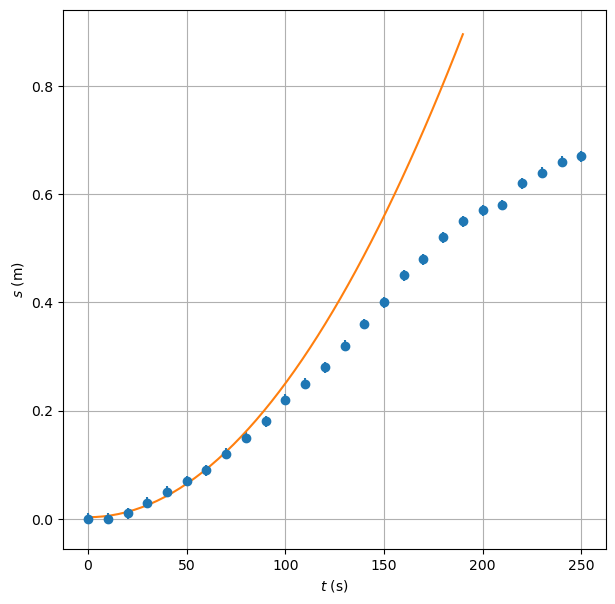

Gravitational constant:  G  = (5.19 +/- 0.45) * 10^-11 m^3 kg^–1 s^–2
Scale offset:            s0 = (3.0 +/- 5.1) mm
Correlation coefficient: r  = -0.72


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# parameter values
m = 0.02  # small mass in kg
M = 1.5   # large mass in kg
R = 0.05  # half distance of large masses in meters
r = 0.042  # difference between small and large mass in meters
L = 14.0  # distance to scale in meters

# data: time in seconds and scale readings in units of scale divisions ("ticks")
# measurement taken on Januar 16, 2025
time  = np.array( [0, 10, 20, 30, 40, 
                   50, 60, 70, 80, 90, 
                   100, 110, 120, 130, 140, 
                   150, 160, 170, 180, 190,
                  200, 210, 220, 230, 240,
                  250 ])
scale = np.array( [ 0.0, 0.0, 0.5, 1.5, 2.5, 
                   3.5, 4.5, 6.0, 7.5, 9.0, 
                   11.0, 12.5, 14.0, 16.0, 18.0, 
                   20.0, 22.5, 24.0, 26.0, 27.5, 
                   28.5, 29.0, 31.0, 32.0, 33.0, 
                   33.5 ] )
#scale = np.array( [ 0.0, 0.5, 1.0, 1.5, 2.0, 
#                   3.0, 4.5, 6.0, 8.0, 9.5, 
#                   11.5, 13.5, 16.0, 18.0, 20.5, 
#                   23.0, 25.5, 28.0, 30.0, 32.5 ] )

# scale calibration: a scale division is equivalent to 2 cm
calib = 0.02
s = scale*calib

# rough estimation of uncertainty in reading values off scale: 0.5 ticks
s_uncertainty = 0.5*calib*np.ones(len(time))


# plot
fig,ax = plt.subplots(figsize=(7,7))

ax.errorbar( time, s, yerr=s_uncertainty, fmt='o' )
                  
# make axis labels nicer
ax.set_xlabel( r'$t$ (s)' )
ax.set_ylabel( r'$s$ (m)' )
ax.grid( True )

# fit a quadratic function to the data
# restrict data to values inside the quadratic regime (<70 s)
tmax    = 70
fittime = time[time<=tmax]
fits    = s[time<=tmax]
fitsunc = s_uncertainty[time<=tmax]

# define fit function for s(t): fit G directly as the only parameter of interest, allow for offset s0
s_func = lambda t, *par: par[0] * 2*M*L/(r**2*R)*t**2 + par[1]

# three-parameter fit, also allowing for time offset t0
#s_func = lambda t, *par: par[0] * 2*M*L/(r**2*R)*(t-par[2])**2 + par[1]

# obtain fit parameter and its variance
popt, pcov = curve_fit(s_func, 
                       xdata=fittime, ydata=fits, 
                       p0=[6.7e-11,0.0], sigma=fitsunc, 
                       absolute_sigma=True )

# parameter values and standard deviations for G and offset s0
G      = popt[0]
G_unc  = np.sqrt( pcov[0][0] )

s0     = popt[1]
s0_unc = np.sqrt( pcov[1][1] )

#t0     = popt[2]
#t0_unc = np.sqrt( pcov[2][2] )

# Pearson correlation coefficient of G and s0
rho = pcov[1][0]/(G_unc*s0_unc)

# plot the function with fitted parameters
t = np.linspace( 0, 190 )
ax.plot( t, s_func( t, G, s0 ) )
#ax.plot( t, s_func( t, G, s0, t0 ) )

# save and display plot
plt.savefig( 'cavendish.pdf' )
plt.show()

print( "Gravitational constant:  G  = (%4.2f +/- %4.2f) * 10^-11 m^3 kg^–1 s^–2" % 
      ( 1e11*G, 1e11*G_unc ) )
print( "Scale offset:            s0 = (%3.1f +/- %3.1f) mm" % 
      ( 1e3*s0, 1e3*s0_unc ))
#print( "Time offset:             t0 = (%3.1f +/- %3.1f) s" % 
#      ( t0, t0_unc ))
print( "Correlation coefficient: r  = %4.2f" % rho )
